   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
    gender race/ethnicity parental level of education     lunch  \
1   female        group C                some college  standard   
2   female        group B

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


T test
T-statistic: -4.169913529142, p-value: 3.311973638243664e-05


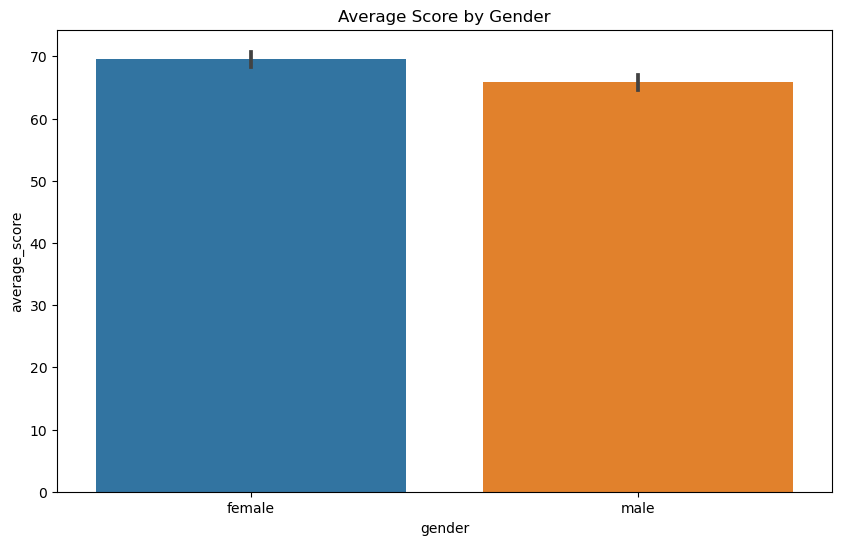

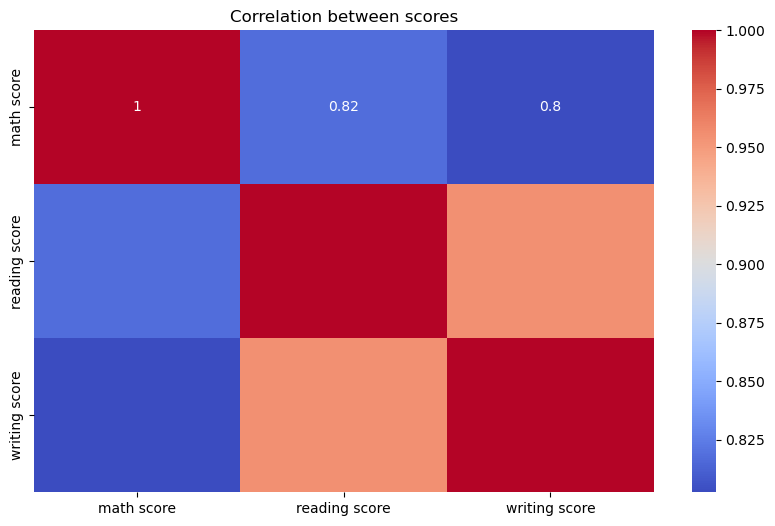

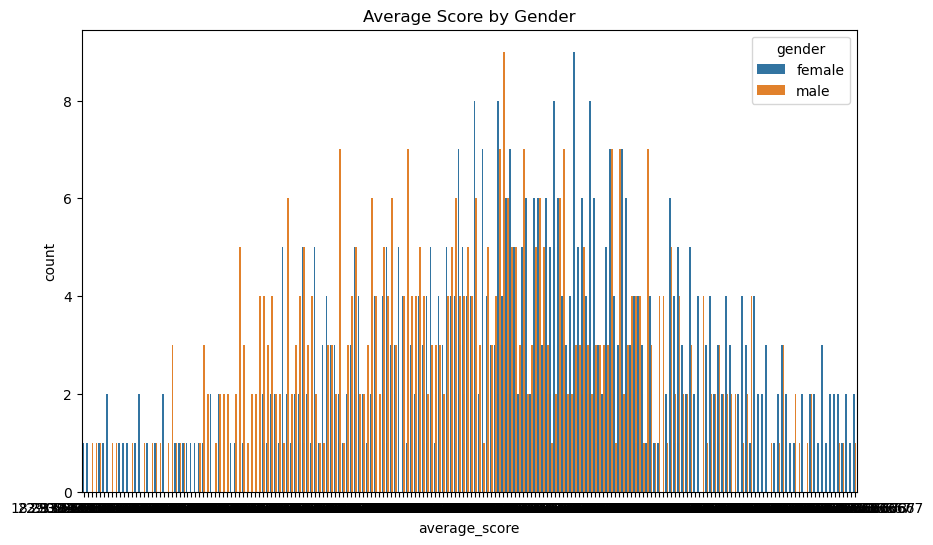

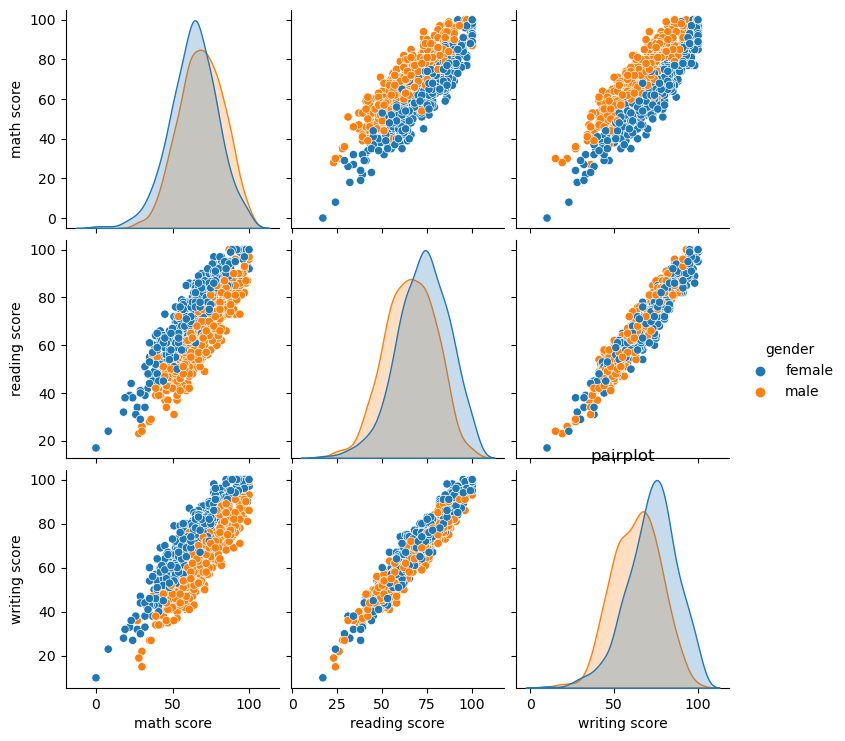

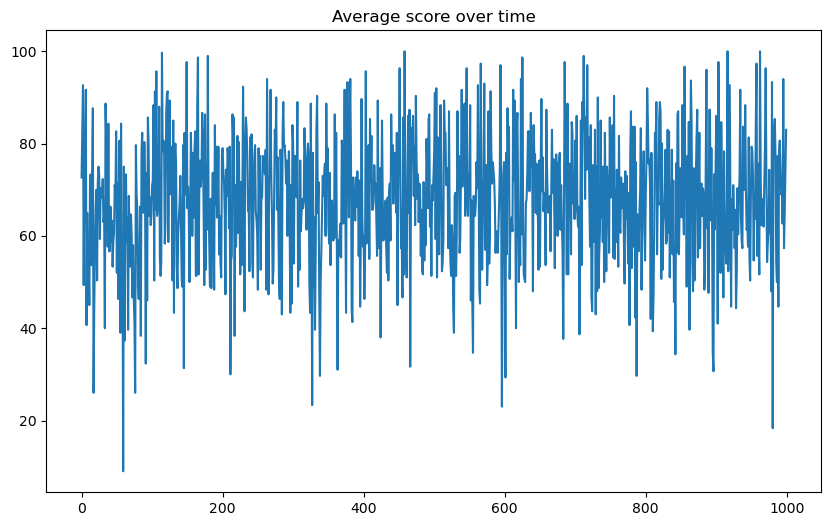

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("D:/DataScience/StudentsPerformance.csv")
print(df.head())

# add new column:average score
df['average_score'] = df[['math score','reading score','writing score']].mean(axis= 1)
high_achievers=df[df['average_score']>80]
print(high_achievers.head())

#plotting
#bar plot of averages scores by gender
plt.figure(figsize=(10,6))
sns.barplot(x='gender',y='average_score',data=df)
plt.title('Average Score by Gender')
# plt.show()


#heatmap of score correlations
plt.figure(figsize=(10,6))
sns.heatmap(df[['math score','reading score','writing score']].corr(),annot=True, cmap='coolwarm')
plt.title('Correlation between scores')
# plt.show()

#count plot of average scores by gender
plt.figure(figsize=(10,6))
sns.countplot(x='average_score',hue='gender',data=df)
plt.title('Average Score by Gender')
# plt.show()

sns.pairplot(df, vars=['math score', 'reading score', 'writing score'], hue='gender')
plt.title("pairplot").axis=0  # Display the plot
# plt.show()

#lineplot
plt.figure(figsize=(10,6))
plt.plot(df['average_score'],label='Average Score')
plt.title("Average score over time")
# plt.show()

#scipy for data analysis
print("T test")
from scipy import stats

male_scores=df[df['gender']=='male']['average_score']
female_scores=df[df['gender']=='female']['average_score']
t_stat, p_val = stats.ttest_ind(male_scores, female_scores)
print(f'T-statistic: {t_stat}, p-value: {p_val}')


In [2]:
#Machine learning with scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=df[['reading score','writing score']]
y=df['math score']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [3]:
print("Model Coefficients:", model.coef_)
print("R^2 Score:", model.score(x_test, y_test))

Model Coefficients: [0.57555997 0.27176146]
R^2 Score: 0.6825697127424626
